# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as skm
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1184444 #replace with your ID
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255

Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [41 61 60 49 55 35 48 56 44 51]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


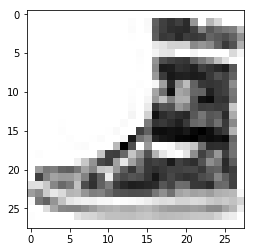

LABEL: 9
INPUT:


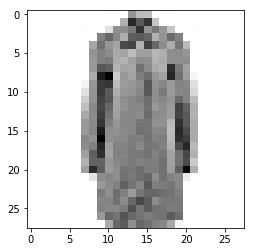

LABEL: 3
INPUT:


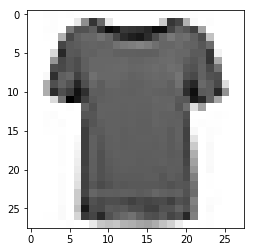

LABEL: 6
INPUT:


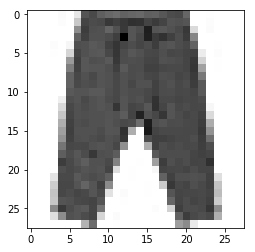

LABEL: 1


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)
plot_input(X_test,y_test,10000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 5-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

#grid of parameters for your SVC
#param_grid = [
#  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
#  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['poly']},
# ]

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#run linear SVM
svcclassifier = SVC(kernel='linear')
clf = GridSearchCV(svcclassifier, parameters, cv=5)
clf.fit(X_train, y_train)


print ('RESULTS FOR LINEAR KERNEL')
print("Best parameters set found:")

best_parameters = clf.best_params_ 
print(best_parameters)

print("Score with best parameters:")

best_score = clf.best_score_
print(best_score)

print("All scores on the grid:")

print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['std_test_score'])

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 1}
Score with best parameters:
0.74
All scores on the grid:
[0.48  0.728 0.736 0.74  0.74  0.74 ]
[0.0220997  0.03798888 0.03274001 0.04317808 0.04317808 0.04317808]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel

svcclassifier = SVC(kernel='poly', degree=2)
clf = GridSearchCV(svcclassifier, parameters, cv=5)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("\nBest parameters set found:")
best_parameters = clf.best_params_ 
print(best_parameters)

print("\nScore with best parameters:")
best_score = clf.best_score_
print(best_score)

print("\nAll scores on the grid:")
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['std_test_score'])

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 0.1, 'gamma': 0.1}

Score with best parameters:
0.728

All scores on the grid:
[0.188 0.696 0.724 0.592 0.728 0.726 0.696 0.724 0.726]
[0.00836659 0.0458227  0.04597444 0.05460587 0.04155202 0.04254178
 0.0458227  0.04597444 0.04254178]


## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of higher degree kernel
degree = 3
svcclassifier = SVC(kernel='poly', degree=3)
clf = GridSearchCV(svcclassifier, parameters, cv=5)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')
print("Best parameters set found:")

best_parameters = clf.best_params_ 
print(best_parameters)

print("Score with best parameters:")

best_score = clf.best_score_
print(best_score)

print("\nAll scores on the grid:")

print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['std_test_score'])

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.702

All scores on the grid:
[0.35  0.702 0.692 0.576 0.69  0.692 0.674 0.692 0.692]
[0.02884195 0.06105371 0.04380066 0.04811638 0.04055016 0.04380066
 0.03743994 0.04380066 0.04380066]


## TO DO4 
What do you observe when fitting a higher degree polynomial on this dataset?

When I increase the polynomial degree I got a lower performance, I've tried also with a degree 10 polynomial which leads to a best score of 0.5.

## TO DO 5
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.01,0.1]}

#run SVM with rbf kernel
svcclassifier = SVC(kernel='rbf')
clf = GridSearchCV(svcclassifier, parameters, cv=5)
clf.fit(X_train, y_train)


print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")

best_parameters = clf.best_params_ 
print(best_parameters)

print("Score with best parameters:")

best_score = clf.best_score_
print(best_score)

print("All scores on the grid:")
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['std_test_score'])

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.756
All scores on the grid:
[0.14  0.44  0.44  0.138 0.654 0.744 0.744 0.538 0.736 0.756 0.756 0.556
 0.752 0.754 0.754 0.556]
[0.03216203 0.02280678 0.02280678 0.03278616 0.03625003 0.03462067
 0.03462067 0.04881119 0.03715386 0.03701046 0.03701046 0.06104928
 0.03876592 0.03535215 0.03535215 0.06104928]


## TO DO 6
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV

#best is with kernel=rbf c=10 and gamma=0.01
parameters = {'C': [10],'gamma':[0.01]}
new_SVM = SVC(kernel='rbf')
best_SVM = GridSearchCV(new_SVM, parameters, cv=5)
best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.202387


## More data
Now let's do the same but using more data points for training.

### TO DO 7
Choose a new number of data points.

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [196 197 188 212 181 198 213 203 228 184]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

In [14]:
#get training and test error for the best SVM model from CV

parameters = {'C': [10],'gamma':[0.01]}
new_SVM = SVC(kernel='rbf')
best_SVM = GridSearchCV(new_SVM, parameters, cv=5)
best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.004000
Best SVM test error: 0.159517


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

In [15]:
from sklearn import linear_model

linear_Class = linear_model.LogisticRegression()
linear_Class.fit(X_train, y_train)

training_error = 1 - linear_Class.score(X_train, y_train)
test_error = 1 -  linear_Class.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.036000
Best logistic regression test error: 0.184517


## TO DO 9
Compare and discuss:
- the results from SVM with m=500 and with m=30000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression


I've changed the size up to 2000 (even with this size the computation requires 45s), the test error has reduced of
0.05 which is a significant change, obviously the test error has increased, but this is a convenient trade off.

Logistic regression performs a little worse than SVM, but it's much faster. Training error is still low while the test's one is a little higher.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

Logistic regression
INPUT:


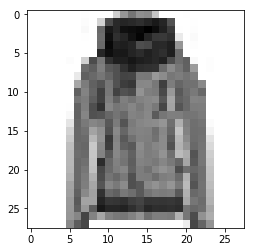

LABEL: 4
SVM
INPUT:


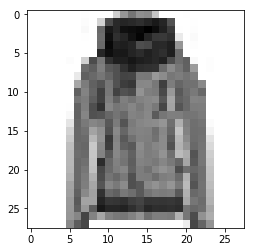

LABEL: 2


In [16]:
LR_prediction = linear_Class.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

for i in range(LR_prediction.shape[0]):
    if( (LR_prediction[i]==y_test[i]) and (LR_prediction[i] != SVM_prediction[i])):
        missIndex = i
        break
print("Logistic regression")
plot_input(X_test, LR_prediction, missIndex)
print("SVM")
plot_input(X_test, SVM_prediction, missIndex)

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by dividing each row for the number of samples in each class in order to measure the accuracy on each single class.


In [17]:
np.set_printoptions(precision=2, suppress=True,floatmode='fixed') # for better aligned printing of confusion matrix

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
normalizedConfusionSVM = []
i = 0
for row in confusion_SVM:
    normalizedConfusionSVM.append(row/counts[i])
    i+=1
normalizedConfusionSVM = np.array(normalizedConfusionSVM)    
print("\n Normalized confusion matrix SVM: \n \n:", normalizedConfusionSVM)

confusion_LR = skm.confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
normalizedConfusionLR = []
i = 0
for row in confusion_LR:
    normalizedConfusionLR.append(row/counts[i])
    i+=1
normalizedConfusionLR = np.array(normalizedConfusionLR)
print("\n Normalized confusion matrix LR: \n \n:", normalizedConfusionLR)


Labels and frequencies in test set:  [5804 5803 5812 5788 5819 5802 5787 5797 5772 5816]

 Confusion matrix SVM  
 
 [[4590    9   84  239   23   12  771    0   76    0]
 [  20 5529   36  163   14    1   39    0    1    0]
 [  80    6 4200   54  763    4  656    0   49    0]
 [ 219   50   57 5014  160    0  275    0   13    0]
 [   9    6  563  261 4299    2  657    0   21    1]
 [   0    0    4    4    0 5396    3  270   21  104]
 [ 873   10  556  167  448    5 3619    0  109    0]
 [   0    0    0    0    0  253    0 5203    4  337]
 [  15    5   38   35   25   59  103   32 5452    8]
 [   0    0    2    1    0  111    1  253    2 5446]]

 Normalized confusion matrix SVM: 
 
: [[0.79 0.00 0.01 0.04 0.00 0.00 0.13 0.00 0.01 0.00]
 [0.00 0.95 0.01 0.03 0.00 0.00 0.01 0.00 0.00 0.00]
 [0.01 0.00 0.72 0.01 0.13 0.00 0.11 0.00 0.01 0.00]
 [0.04 0.01 0.01 0.87 0.03 0.00 0.05 0.00 0.00 0.00]
 [0.00 0.00 0.10 0.04 0.74 0.00 0.11 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.93 0.00 0.05 0.00 

## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

It's hard to say why some performs better, this may depend because some clothes are very similar and the classification algorithm fails in certain cases, in fact It seems that the ones with lower performances are the third and the 7th element, so the t-shirt and the pull-over. For the same reason, inspectioning the matrix, we see that an ankle boot is almost never classified as a shirt.
